# <font color="#008080">HW #2 Multivariable data processing: Applications of Singular Value Decomposition</font>

#### Profesor: EMILIO BAROCIO ESPEJO
#### Alumno: Ortega Camargo Fernando
#### GitHub Tarea2:
###### https://github.com/Fortega95/MEM_MCD/blob/main
Fecha: 30-01-23

### Librerías necesarias

In [1]:
## importamos librerias
import os                                 #Liberia de manejo de sistema operativo

import pandas as pd                       #librerias de manejo ed arrays y dataframes
import numpy as np 
                                          # librerias de graficación
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
import matplotlib.image as mpimg
warnings.filterwarnings("ignore")


sns.set()

#### cargamos data set

In [2]:
iris=pd.read_csv("D://Maestria//git//MEM_MCD//Bases//Iris.csv")

####  <font color="#008080">Análisis rápido de estructura</font>

In [3]:
iris.head(5)   #vemos primeros renglones de la base

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
## datos generales de estructura

print(f"Dimension de la base iris: {iris.shape}")
print("###Columnas:")
print(list(iris.columns))

Dimension de la base iris: (150, 6)
###Columnas:
['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [5]:
iris.info()   # informacion general de estructura, nulos, y tipo de dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.Id= iris.Id.astype("str")   # El id no representa un valor categorico ordinal, por lo que transformamos a STR para hacerlo categorico nominal

In [7]:
iris.describe(include="all")    #análisis estadístico rápido

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count   150     150.000000    150.000000     150.000000    150.000000   
unique  150            NaN           NaN            NaN           NaN   
top       1            NaN           NaN            NaN           NaN   
freq      1            NaN           NaN            NaN           NaN   
mean    NaN       5.843333      3.054000       3.758667      1.198667   
std     NaN       0.828066      0.433594       1.764420      0.763161   
min     NaN       4.300000      2.000000       1.000000      0.100000   
25%     NaN       5.100000      2.800000       1.600000      0.300000   
50%     NaN       5.800000      3.000000       4.350000      1.300000   
75%     NaN       6.400000      3.300000       5.100000      1.800000   
max     NaN       7.900000      4.400000       6.900000      2.500000   

            Species  
count           150  
unique            3  
top     Iris-setosa  
freq             50  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN

In [8]:
iris.Species.value_counts()   #validamos la cantidad de datos por categoría

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
iris.dtypes    #validamos el tipo de dato en python

Id                object
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## scatter

In [39]:
iris

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [40]:
import plotly.express as px

df = iris
fig = px.scatter_3d(df, x='SepalLengthCm', y='SepalWidthCm', z='PetalWidthCm',
              color='Species')
fig.show()

<Figure size 4000x1000 with 0 Axes>

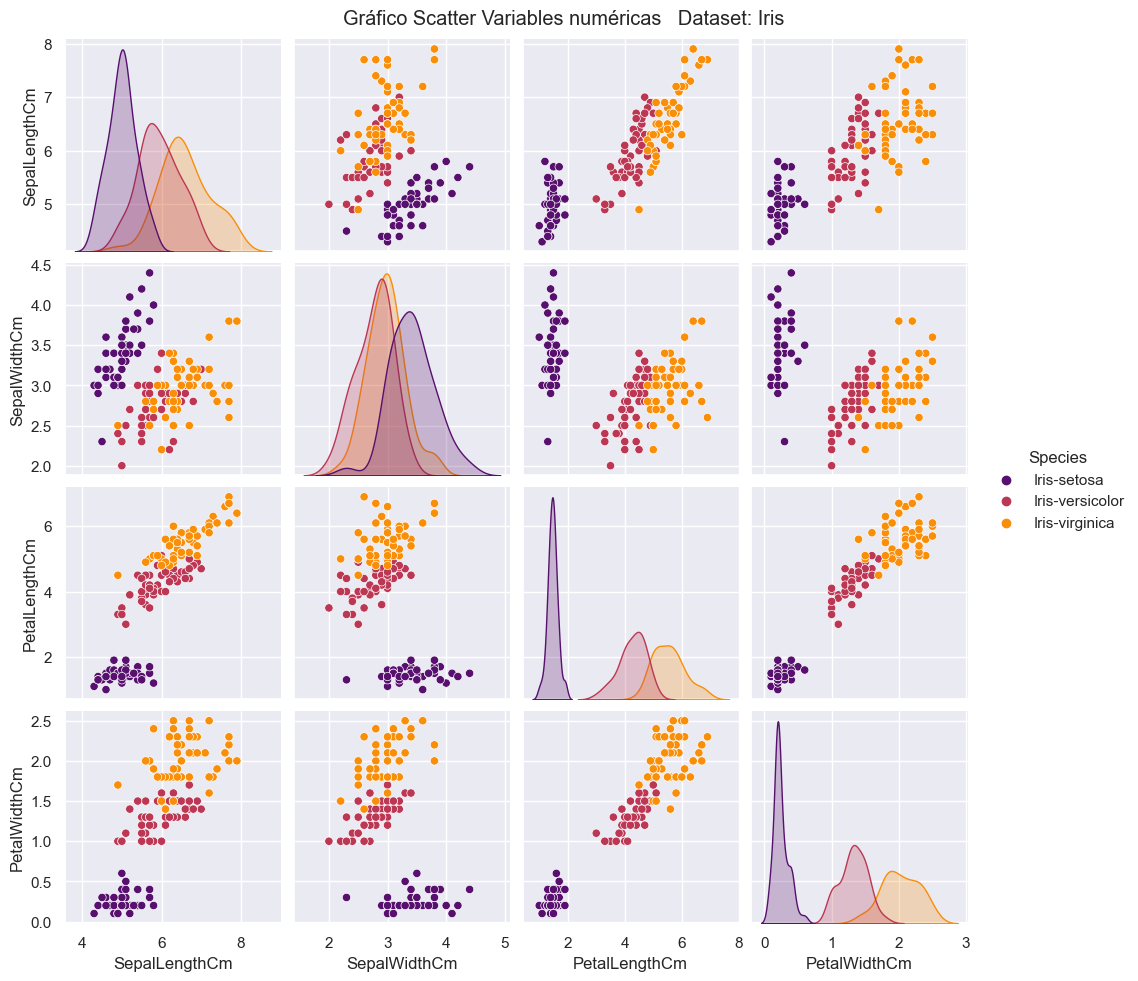

In [10]:
plt.figure(figsize=(40,10))  #definimos el grid de gráficos asi como tamaño

sns.pairplot(iris,hue='Species',palette='inferno')                         #graficaremos todas las variables numéricas y asignaremos un hue por categoría
plt.suptitle("Gráfico Scatter Variables numéricas   Dataset: Iris")

plt.subplots_adjust(top=.95)

plt.show()

## aplicamos svd

In [11]:
X=iris.iloc[:,1:-1]

In [12]:
X

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]

In [13]:
U,S,VT = np.linalg.svd(X,full_matrices=False)

S=np.diag(S)

In [14]:
pd.DataFrame(S)

0          1         2         3
0  95.950668   0.000000  0.000000  0.000000
1   0.000000  17.722953  0.000000  0.000000
2   0.000000   0.000000  3.469297  0.000000
3   0.000000   0.000000  0.000000  1.878912

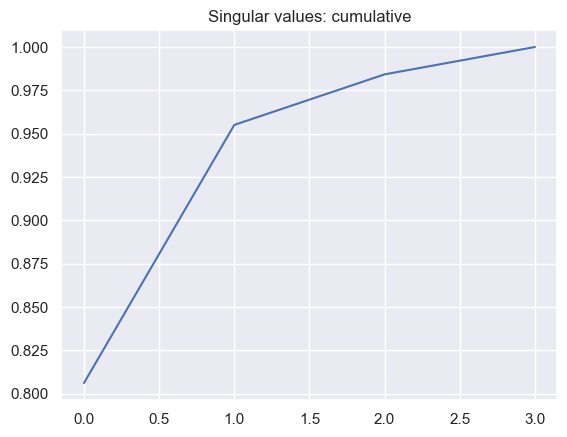

In [15]:
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title("Singular values: cumulative")
plt.show()


# r=1

In [16]:
r=1  
# 600
# 150 + 4 = 154
# 150 + 4 + 150 + 4 = 308  
# 150 + 4  +  150 + 4  150 + 4 =462
# 150 + 4  +  150 + 4  150 + 4 +150 + 4 =462

In [22]:
Xapprox= U[:,:r] @ S[0:r,:r]@VT[:r,:]

<Figure size 4000x1000 with 0 Axes>

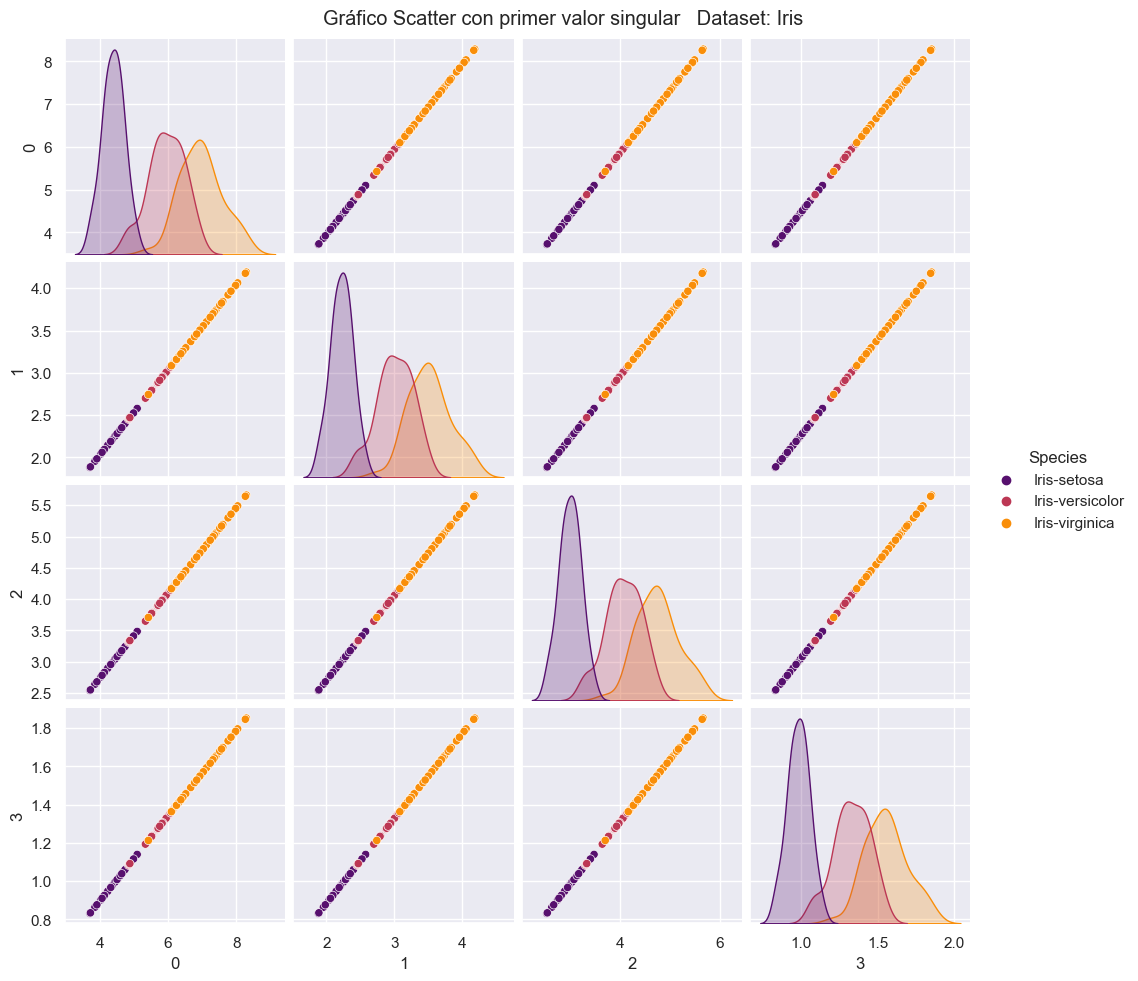

In [24]:
plt.figure(figsize=(40,10))  #definimos el grid de gráficos asi como tamaño

sns.pairplot(pd.concat([pd.DataFrame(Xapprox),iris.Species],axis=1),hue="Species",palette='inferno')                         #graficaremos todas las variables numéricas y asignaremos un hue por categoría
plt.suptitle("Gráfico Scatter con primer valor singular   Dataset: Iris")

plt.subplots_adjust(top=.95)

plt.show()

# error y CO

#### Compression Ratio

El "Compression Ratio" (CR) en un problema de descomposición en valores singulares se refiere a la relación entre la cantidad de información retenida después de la compresión y la cantidad de información original. Se calcula  a partir de la siguiente fórmula:  

$CO =\frac{Número de singularidades retenidas}{Número total de singularidades en la matriz original} $ 

In [25]:
# en nuestro Caso con R = 1 tenemos que el total de singularidades esta dado por s

CO = r / len(np.diag(S))

print(f" el compression Ratio para r = 1 es : {CO}")

 el compression Ratio para r = 1 es : 0.25


#### MAPE

El Mean Absolute Percent Error (MAPE) es una medida que se utiliza  para evaluar la precisión de un modelo en relación con los valores reales. En el contexto de la descomposición en valores singulares (SVD), se usa el MAPE para comparar la matriz original con la matriz reconstruida utilizando un número específico de singularidades retenidas.

In [26]:
absolute_percentage_errors = np.abs((np.array(X) - np.array(Xapprox)) / np.array(X))

mape_value = np.mean(absolute_percentage_errors) * 100

print(f" el MAPE para r = 1 es : {np.round(mape_value,2)}")

 el MAPE para r = 1 es : 51.39


# r=2

In [27]:
r=2
Xapprox= U[:,:r] @ S[0:r,:r]@VT[:r,:]


<Figure size 4000x1000 with 0 Axes>

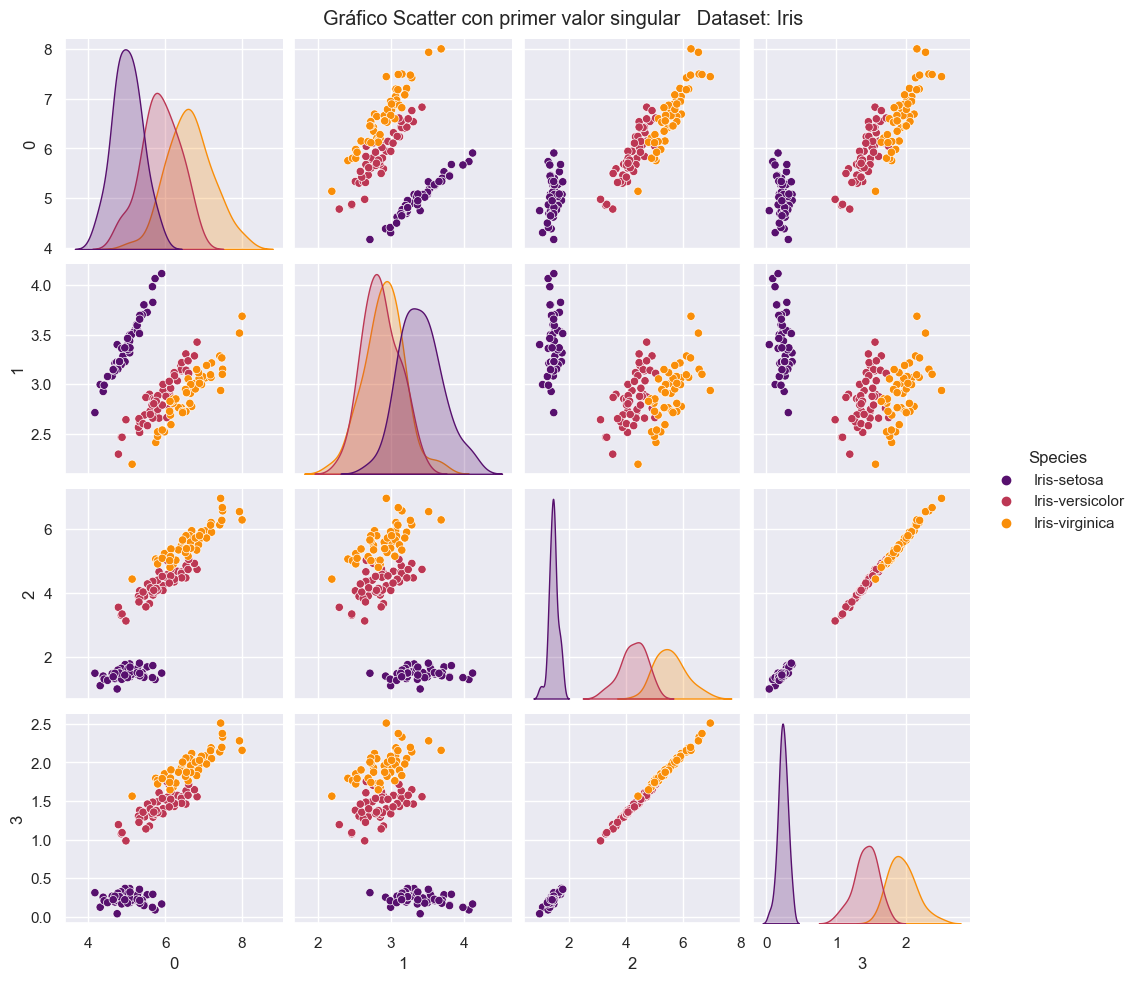

In [28]:

plt.figure(figsize=(40,10))  #definimos el grid de gráficos asi como tamaño

sns.pairplot(pd.concat([pd.DataFrame(Xapprox),iris.Species],axis=1),hue="Species",palette='inferno')                         #graficaremos todas las variables numéricas y asignaremos un hue por categoría
plt.suptitle("Gráfico Scatter con primer valor singular   Dataset: Iris")

plt.subplots_adjust(top=.95)

plt.show()

In [29]:
# en nuestro Caso con R = 1 tenemos que el total de singularidades esta dado por s
r=2
CO = r / len(np.diag(S))

print(f" el compression Ratio para r = 1 es : {CO}")

 el compression Ratio para r = 1 es : 0.5


In [30]:
absolute_percentage_errors = np.abs((np.array(X) - np.array(Xapprox)) / np.array(X))

mape_value = np.mean(absolute_percentage_errors) * 100

print(f" el MAPE para r = 1 es : {np.round(mape_value,2)}")

 el MAPE para r = 1 es : 7.41


In [ ]:
np.sum( np.abs((np.array(X) - np.array(Xapprox)) / np.array(X)))/(150*4)*100

# r= 3

In [31]:
r=3
Xapprox= U[:,:r] @ S[0:r,:r]@VT[:r,:]

<Figure size 4000x1000 with 0 Axes>

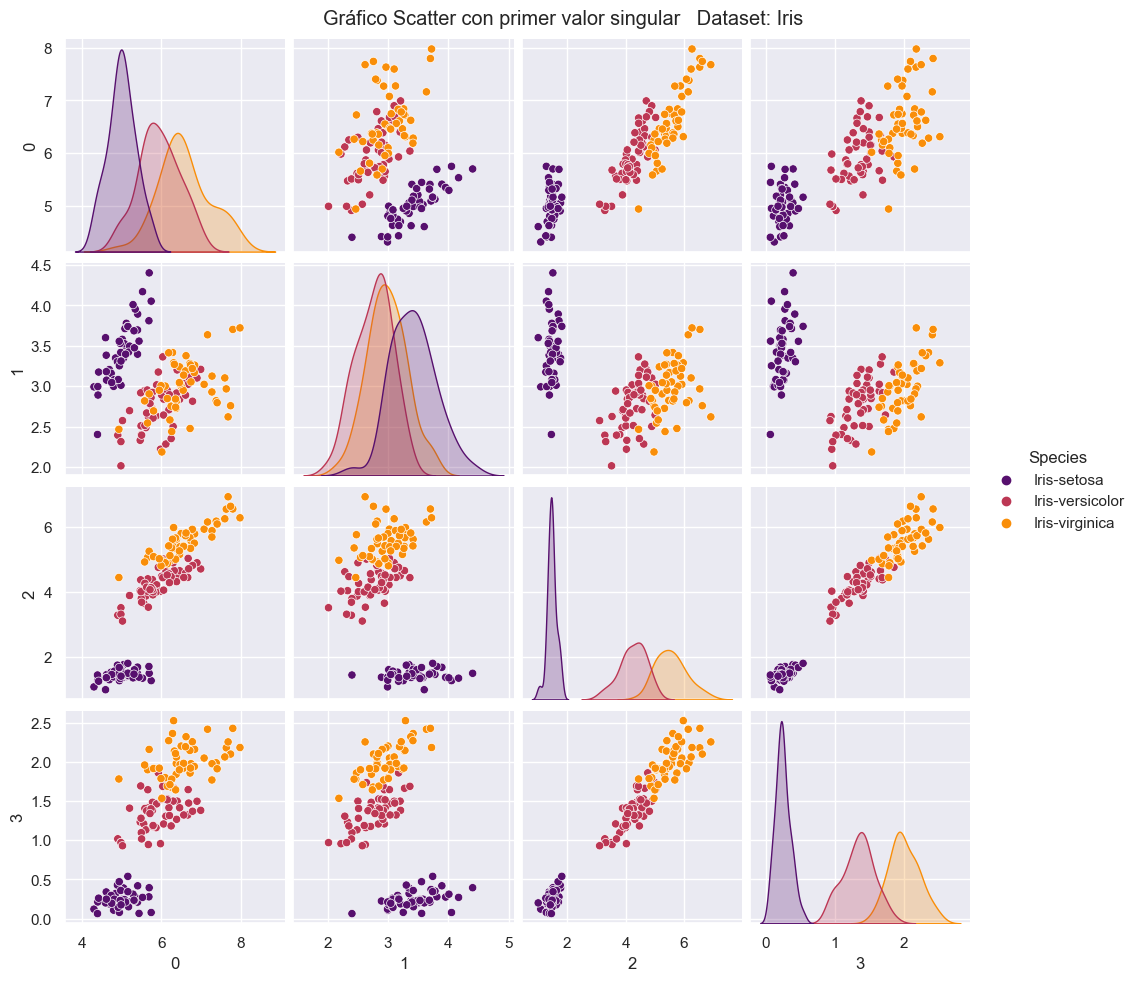

In [32]:


plt.figure(figsize=(40,10))  #definimos el grid de gráficos asi como tamaño

sns.pairplot(pd.concat([pd.DataFrame(Xapprox),iris.Species],axis=1),hue="Species",palette='inferno')                         #graficaremos todas las variables numéricas y asignaremos un hue por categoría
plt.suptitle("Gráfico Scatter con primer valor singular   Dataset: Iris")

plt.subplots_adjust(top=.95)

plt.show()

In [33]:
# en nuestro Caso con R = 1 tenemos que el total de singularidades esta dado por s
r=3
CO = r / len(np.diag(S))

print(f" el compression Ratio para r = 1 es : {CO}")

 el compression Ratio para r = 1 es : 0.75


In [34]:
absolute_percentage_errors = np.abs((np.array(X) - np.array(Xapprox)) / np.array(X))

mape_value = np.mean(absolute_percentage_errors) * 100

print(f" el MAPE para r = 1 es : {np.round(mape_value,2)}")

 el MAPE para r = 1 es : 4.48


# r = 4

In [35]:
r=4
Xapprox= U[:,:r] @ S[0:r,:r]@VT[:r,:]

<Figure size 4000x1000 with 0 Axes>

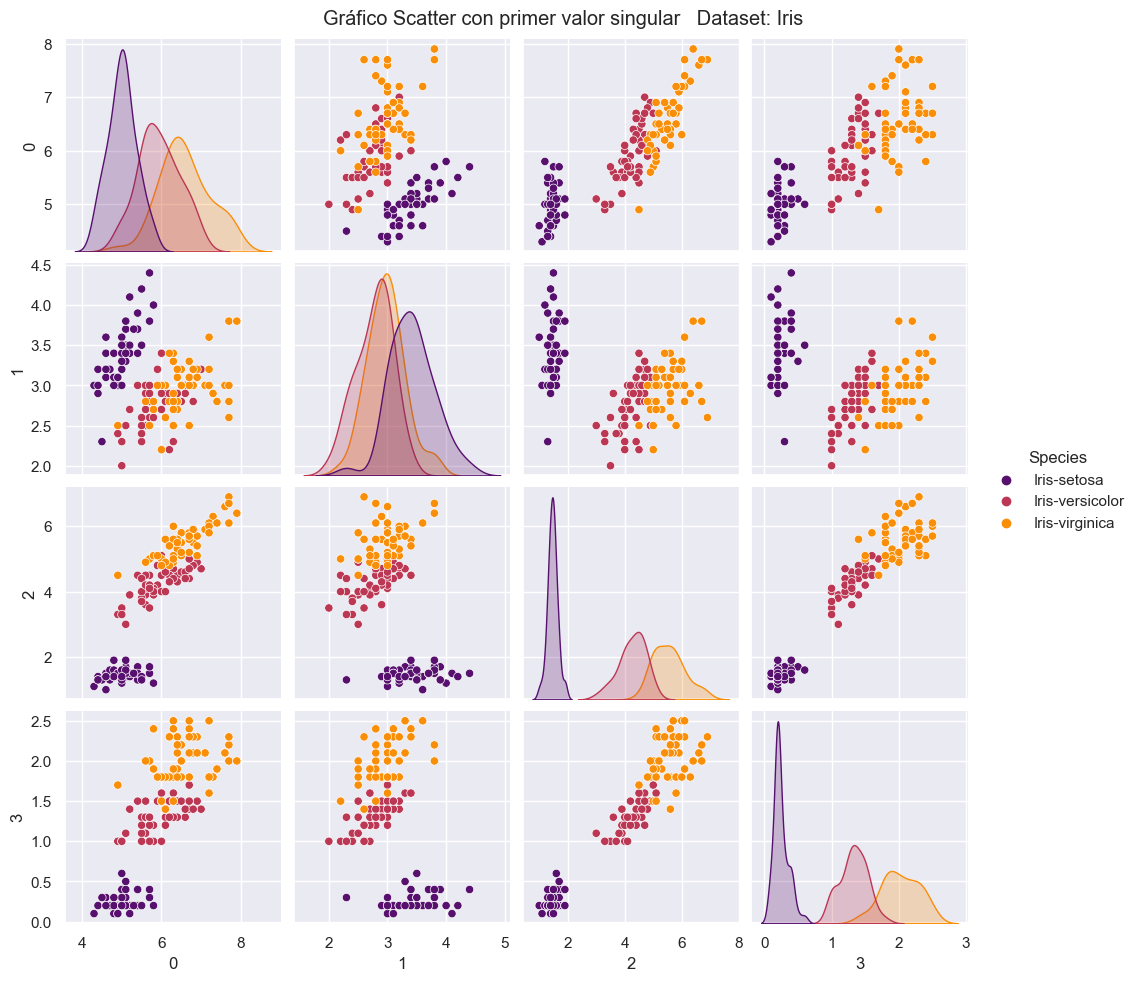

In [36]:


plt.figure(figsize=(40,10))  #definimos el grid de gráficos asi como tamaño

sns.pairplot(pd.concat([pd.DataFrame(Xapprox),iris.Species],axis=1),hue="Species",palette='inferno')                         #graficaremos todas las variables numéricas y asignaremos un hue por categoría
plt.suptitle("Gráfico Scatter con primer valor singular   Dataset: Iris")

plt.subplots_adjust(top=.95)

plt.show()

In [37]:
# en nuestro Caso con R = 1 tenemos que el total de singularidades esta dado por s
r=4
CO = r / len(np.diag(S))

print(f" el compression Ratio para r = 1 es : {CO}")

 el compression Ratio para r = 1 es : 1.0


In [38]:
absolute_percentage_errors = np.abs((np.array(X) - np.array(Xapprox)) / np.array(X))

mape_value = np.mean(absolute_percentage_errors) * 100

print(f" el MAPE para r = 1 es : {np.round(mape_value,2)}")

 el MAPE para r = 1 es : 0.0
